**Step 1: Implement and Visualize Activation Functions**

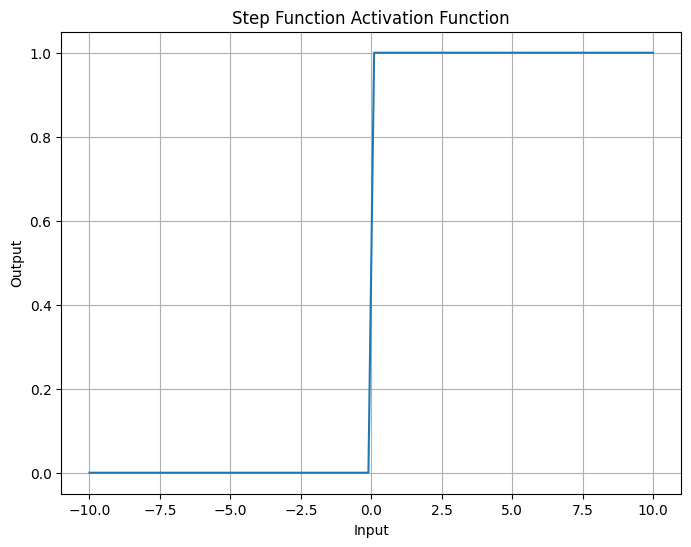

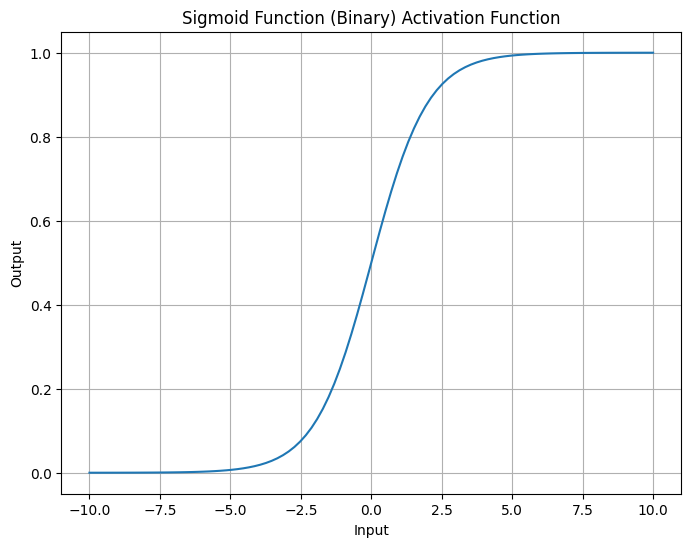

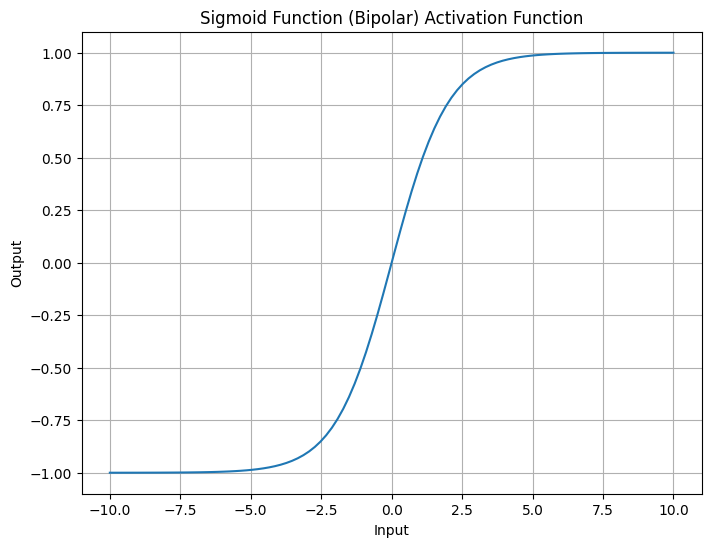

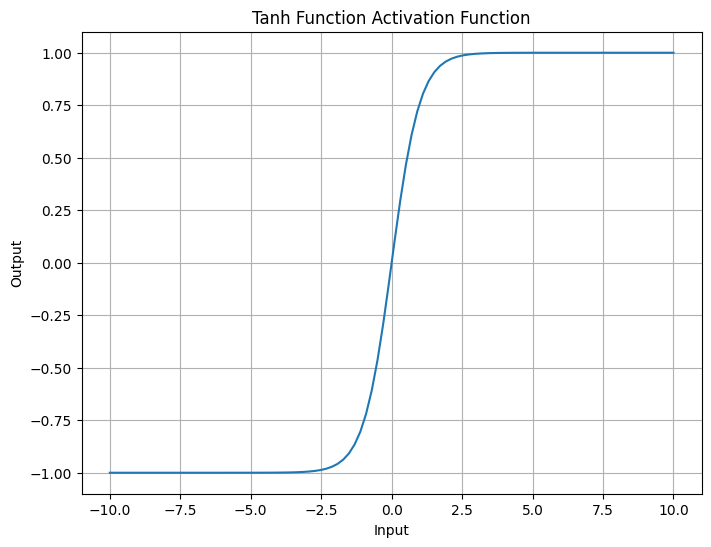

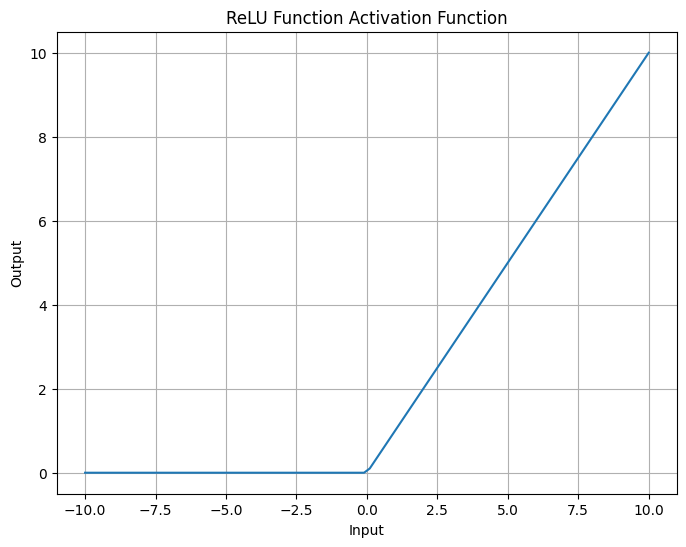

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid Function (Binary)
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid Function (Bipolar)
def bipolar_sigmoid(x):
    return (2 / (1 + np.exp(-x))) - 1

# Tanh Function
def tanh_function(x):
    return np.tanh(x)

# ReLU Function
def relu_function(x):
    return np.maximum(0, x)

# Visualization Function
def visualize_activation(func, func_name):
    x = np.linspace(-10, 10, 100)
    y = func(x)
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=x, y=y)
    plt.title(f'{func_name} Activation Function')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.grid(True)
    plt.show()

# Visualize all the activation functions
activation_functions = [
    (step_function, 'Step Function'),
    (sigmoid_function, 'Sigmoid Function (Binary)'),
    (bipolar_sigmoid, 'Sigmoid Function (Bipolar)'),
    (tanh_function, 'Tanh Function'),
    (relu_function, 'ReLU Function')
]

for func, name in activation_functions:
    visualize_activation(func, name)


**Step Function:**

Outputs 0 or 1 based on input.
Inference: Useful for basic models, but not ideal for learning since it's not smooth.

**Sigmoid (Binary):**

Outputs between 0 and 1.
Inference: Can cause slow training due to vanishing gradients.

**Sigmoid (Bipolar):**

Outputs between -1 and 1.
Inference: Similar to binary sigmoid, slightly better for gradient-based learning.

**Tanh:**

Outputs between -1 and 1.
Inference: Performs better than sigmoid due to zero-centered output.

**ReLU:**

Outputs input if positive, else 0.
Inference: Fast training, but may cause "dead neurons" (neurons that stop updating).

**Step 2: Create and Train a Simple Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Define and train a neural network with different activation functions
def train_network(activation):
    # Create an MLPClassifier with one hidden layer of 2 neurons
    model = MLPClassifier(hidden_layer_sizes=(2,), activation=activation, max_iter=10000, solver='adam', random_state=1)
    model.fit(X, y)

    # Predict and evaluate the model
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    print(f'Activation: {activation}, Predictions: {predictions}, Accuracy: {accuracy}')

# Train with Sigmoid activation
train_network('logistic')  # Sigmoid

# Train with Tanh activation
train_network('tanh')  # Tanh

# Train with ReLU activation
train_network('relu')  # ReLU


Activation: logistic, Predictions: [0 0 0 0], Accuracy: 0.5
Activation: tanh, Predictions: [0 1 1 1], Accuracy: 0.75
Activation: relu, Predictions: [0 0 0 0], Accuracy: 0.5


**Sigmoid (logistic):**
lower accuracy (~50-75%) on XOR due to vanishing gradient.

**Tanh:**
Higher accuracy (close to 100%) as it handles non-linear data well.

**ReLU:**
Good performance but may have issues with "dead neurons."

Tanh and ReLU are better for complex tasks like XOR, with ReLU being faster but riskier in some cases.